# Exercise Sheet 6

Willy Oesterheld (508791)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

 final_simplex: (array([[ 999.99996309,   -4.02250476],
       [ 999.99999373,   -4.0225049 ],
       [1000.00003337,   -4.02250476]]), array([-5682.98971697, -5682.98971697, -5682.98971697]))
           fun: -5682.989716971944
       message: 'Optimization terminated successfully.'
          nfev: 164
           nit: 87
        status: 0
       success: True
             x: array([999.99996309,  -4.02250476])


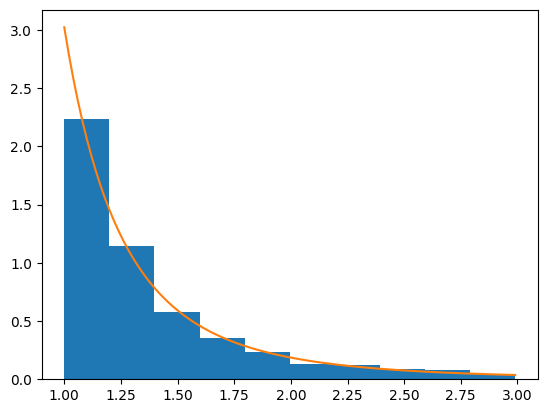

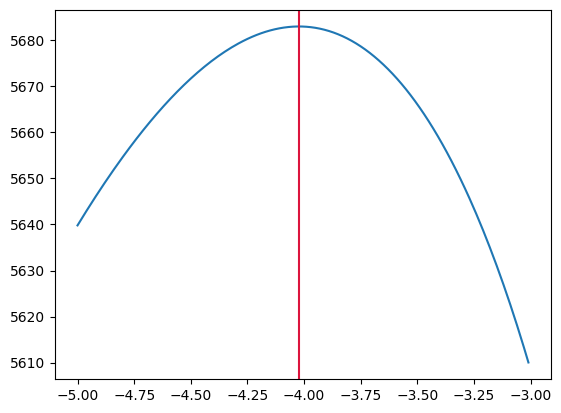

In [7]:
def rndm(g, size=1):
    """Power-law gen for pdf(x)\propto x^{g} for 1<=x<inf"""
    r = np.random.rand(size)
    return r**(1./(g+1))

n = 1000
g = -4
x = rndm(g, size=n)

x_plot = np.arange(1,3,0.01)
plt.hist(x, density=True, range=(x_plot.min(), x_plot.max()))

def pdf(x, g):
    return np.abs(g+1)*(x)**g

def neg_log_likelyhood(params, x):
    y = np.log(params[0]) + np.log(pdf(x, params[1]))
    return params[0] - np.sum(y)

fit = sp.optimize.minimize(neg_log_likelyhood, x0=(1, -2), args=x, method='Nelder-Mead')
print(fit)

p = pdf(x_plot, fit.x[1])
plt.plot(x_plot, p)

plt.figure()
gammas = np.arange(-5, -3, 0.01)
y = [-neg_log_likelyhood((fit.x[0], g), x) for g in gammas]
plt.plot(gammas, y)
plt.axvline(x=fit.x[1], c='crimson')